In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv("glassdoor_jobs.csv")

# Exploring Dataset

In [3]:
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom


In [4]:
df.shape

(956, 15)

In [5]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [7]:
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


# Data Cleaning

In [8]:
df.isnull().any()

Unnamed: 0           False
Job Title            False
Salary Estimate      False
Job Description      False
Rating               False
Company Name         False
Location             False
Headquarters         False
Size                 False
Founded              False
Type of ownership    False
Industry             False
Sector               False
Revenue              False
Competitors          False
dtype: bool

In [9]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [10]:
df.drop(labels = 'Unnamed: 0', axis = 'columns', inplace = True)
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [11]:
df = df[df['Salary Estimate'] != '-1']

In [12]:
df.shape

(742, 14)

In [13]:
test = lambda x: x.split("(")[0]

In [14]:
test("$53K-$91K (Glassdoor est.)")

'$53K-$91K '

In [15]:
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])

In [16]:
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
950    $58K-$111K 
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
955    $61K-$126K 
Name: Salary Estimate, Length: 742, dtype: object

In [17]:
salary = salary.apply(lambda x: x.replace("$","").replace("K",""))

In [18]:
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: Salary Estimate, Length: 742, dtype: object

In [19]:
salary.unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ', '93-149 ',
       '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ', '74-138 ',
       '64-112 ', '68-129 ', '52-113 ', '110-150',
       'Employer Provided Salary:150-160', '158-211 ', '20-39 ',
       '56-117 ', '63-99 ', '68-114 ', '41-95 ', '86-144 ', '80-139 ',
       '56-95 ', '120-189 ', '111-176 ', '84-146 ', '107-172 ', '49-85 ',
       '61-109 ', '88-148 ', '60-99 ', '41-72 ', '96-161 ', '65-130 ',
       '52-81 ', '139-220 ', '50-102 ', '85-139 ', '74-122 ', '99-157 ',
       '79-222 ', '57-118 ', '86-141 ', '94-154 ', '37-76 ', '100-160 ',
       '55-100 ', '60-114 ', '39-68 ', '64-107 ', '31-65 ', '34-62 ',
       '117-2

In [20]:
df['salary_per_hour'] = salary.apply(lambda x: 1 if "per hour" in x.lower() else 0)

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2787094830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_per_hour'] = salary.apply(lambda x: 1 if "per hour" in x.lower() else 0)


In [21]:
df['salary_per_hour'].value_counts()

salary_per_hour
0    718
1     24
Name: count, dtype: int64

In [22]:
df['emp_provided_salary'] = salary.apply(lambda x: 1 if "employer provided salary" in x.lower() else 0)

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2227071390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_provided_salary'] = salary.apply(lambda x: 1 if "employer provided salary" in x.lower() else 0)


In [23]:
df['emp_provided_salary'].value_counts()

emp_provided_salary
0    725
1     17
Name: count, dtype: int64

In [24]:
salary = salary.apply(lambda x: x.lower().replace("per hour","").replace("employer provided salary:", "").replace(" ", ""))

In [25]:
salary.unique()

array(['53-91', '63-112', '80-90', '56-97', '86-143', '71-119', '54-93',
       '86-142', '38-84', '120-160', '126-201', '64-106', '106-172',
       '46-85', '83-144', '102-190', '67-137', '118-189', '110-175',
       '64-111', '81-130', '73-119', '86-139', '63-105', '109-177',
       '63-110', '75-124', '34-61', '72-120', '93-149', '85-140',
       '77-135', '82-132', '83-137', '115-180', '74-138', '64-112',
       '68-129', '52-113', '110-150', '150-160', '158-211', '20-39',
       '56-117', '63-99', '68-114', '41-95', '86-144', '80-139', '56-95',
       '120-189', '111-176', '84-146', '107-172', '49-85', '61-109',
       '88-148', '60-99', '41-72', '96-161', '65-130', '52-81', '139-220',
       '50-102', '85-139', '74-122', '99-157', '79-222', '57-118',
       '86-141', '94-154', '37-76', '100-160', '55-100', '60-114',
       '39-68', '64-107', '31-65', '34-62', '117-231', '79-134', '52-93',
       '55-116', '72-123', '74-124', '40-73', '102-164', '89-153',
       '61-110', '65-110'

In [26]:
df['min_salary'] = salary.apply(lambda x: int(x.split("-")[0]))
df['min_salary']

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\3894635123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_salary'] = salary.apply(lambda x: int(x.split("-")[0]))


0      53
1      63
2      80
3      56
4      86
       ..
950    58
951    72
952    56
953    95
955    61
Name: min_salary, Length: 742, dtype: int64

In [27]:
df['max_salary'] = salary.apply(lambda x: int(x.split("-")[1]))
df['max_salary']

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2238028822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_salary'] = salary.apply(lambda x: int(x.split("-")[1]))


0       91
1      112
2       90
3       97
4      143
      ... 
950    111
951    133
952     91
953    160
955    126
Name: max_salary, Length: 742, dtype: int64

In [28]:
df["avg_salary"] = (df["max_salary"] + df["min_salary"])/2

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2734051244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["avg_salary"] = (df["max_salary"] + df["min_salary"])/2


In [29]:
df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x['salary_per_hour'] == 1 else x['min_salary'], axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\57064555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x['salary_per_hour'] == 1 else x['min_salary'], axis=1)


In [30]:
df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x['salary_per_hour'] == 1 else x['max_salary'], axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2500011715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x['salary_per_hour'] == 1 else x['max_salary'], axis=1)


In [31]:
df[df['salary_per_hour'] == 1][['salary_per_hour','min_salary','max_salary']]

,salary_per_hour,min_salary,max_salary
197,1,34,48
209,1,42,68
240,1,36,50
247,1,42,68
257,1,30,50
307,1,34,48
337,1,42,68
427,1,36,50
437,1,48,78
456,1,42,68


In [32]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split("\n")[0])

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\6606881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company Name'] = df['Company Name'].apply(lambda x: x.split("\n")[0])


In [33]:
df['Company Name']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
950                                      GSK
951                               Eventbrite
952           Software Engineering Institute
953                             Numeric, LLC
955             Riverside Research Institute
Name: Company Name, Length: 742, dtype: object

In [34]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,salary_per_hour,emp_provided_salary,min_salary,max_salary,avg_salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5


In [35]:
df['Location']

0      Albuquerque, NM
1        Linthicum, MD
2       Clearwater, FL
3         Richland, WA
4         New York, NY
            ...       
950      Cambridge, MA
951      Nashville, TN
952     Pittsburgh, PA
953      Allentown, PA
955    Beavercreek, OH
Name: Location, Length: 742, dtype: object

In [36]:
# df["job_state"] = df["Location"].apply(lambda x: x.split(',')[1])
df['job_state'] = df['Location'].apply(lambda x: x.split(",")[1])


C:\Users\hp\AppData\Local\Temp\ipykernel_7000\685029915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_state'] = df['Location'].apply(lambda x: x.split(",")[1])


In [37]:
df['job_state']

0       NM
1       MD
2       FL
3       WA
4       NY
      ... 
950     MA
951     TN
952     PA
953     PA
955     OH
Name: job_state, Length: 742, dtype: object

In [38]:
df['job_state'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' UT', ' TN', ' DE', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

In [39]:
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'LA')


C:\Users\hp\AppData\Local\Temp\ipykernel_7000\4211558610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'LA')


In [40]:
df['job_state'].value_counts()

job_state
CA    151
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
LA      5
CT      5
IA      5
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: count, dtype: int64

In [41]:
df['company_age'] = df['Founded'].apply(lambda x: x if x<1 else 2023-x)
df['company_age']

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\3600017979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_age'] = df['Founded'].apply(lambda x: x if x<1 else 2023-x)


0       50
1       39
2       13
3       58
4       25
      ... 
950    193
951     17
952     39
953     -1
955     56
Name: company_age, Length: 742, dtype: int64

In [42]:
df.tail()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Sector,Revenue,Competitors,salary_per_hour,emp_provided_salary,min_salary,max_salary,avg_salary,job_state,company_age
950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0,58,111,84.5,MA,193
951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0,72,133,102.5,TN,17
952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,Education,Unknown / Non-Applicable,-1,0,0,56,91,73.5,PA,39
953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,Business Services,$5 to $10 million (USD),-1,0,0,95,160,127.5,PA,-1
955,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,...,Government,$50 to $100 million (USD),-1,0,0,61,126,93.5,OH,56


In [43]:
df['Job Description'][0]

'Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude\nExcellent verbal and written communication skills, and quantitative analytical skills are required\nApplicant must be able to work in a team environment\nU.S. citizenship and ability to obtain a DoD Secret Clearance required\nResponsibilities: The applicant will be responsible for formulating analytical solutions to complex data problems; creating data analytic models to improve data

In [44]:
df['Job Description'][1]

'What You Will Do:\n\nI. General Summary\n\nThe Healthcare Data Scientist position will join our Advanced Analytics group at the University of Maryland Medical System (UMMS) in support of its strategic priority to become a data-driven and outcomes-oriented organization. The successful candidate will have 3+ years of experience with Machine Learning, Predictive Modeling, Statistical Analysis, Mathematical Optimization, Algorithm Development and a passion for working with healthcare data. Previous experience with various computational approaches along with an ability to demonstrate a portfolio of relevant prior projects is essential. This position will report to the UMMS Vice President for Enterprise Data and Analytics (ED&A).\n\nII. Principal Responsibilities and Tasks\n\n• Develops predictive and prescriptive analytic models in support of the organization’s clinical, operations and business initiatives and priorities.\n• Deploys solutions so that they provide actionable insights to the

In [45]:
df['Job Description'][2]

"KnowBe4, Inc. is a high growth information security company. We are the world's largest provider of new-school security awareness training and simulated phishing. KnowBe4 was created to help organizations manage the ongoing problem of social engineering. Tens of thousands of organizations worldwide use KnowBe4's platform to mobilize their end users as a last line of defense and enable them to make better security decisions, every day.\n\nWe are ranked #1 best place to work in technology nationwide by Fortune Magazine and have placed #1 or #2 in The Tampa Bay Top Workplaces Survey for the last four years. We also just had our 27th record-setting quarter in a row!\n\nThe Data Scientist will work closely with the VP of FP&A and the Quantitative Analytics Manager to implement advanced analytical models and other data-driven solutions.\n\nResponsibilities:\nWork with key stakeholders throughout the organization to identify opportunities using financial data to develop business solutions.\n

In [46]:
df['Job Description'][67]

'About Bill.com\n\nBill.com is a leading provider of cloud-based software that simplifies, digitizes, and automates complex, back-office financial operations for small and midsize businesses. Customers use the Bill.com platform to manage end-to-end financial workflows and to process payments, which totaled over $70 billion for fiscal 2019. The Bill.com AI-enabled, financial software platform creates connections between businesses and their suppliers and clients. It helps manage cash inflows and outflows. The company partners with several of the largest U.S. financial institutions, more than 70 of the top 100 U.S. accounting firms, and popular accounting software providers. Bill.com has offices in Palo Alto, California and Houston, Texas. For more information, visit www.bill.com or follow @billcom.\n\nMission: We are looking for a talented, enthusiastic and dedicated data science leader to join Bill.com’s Risk Management team. The incumbent will be responsible for managing junior data s

In [47]:
df['python_job'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['r_job'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() else 0)
df['aws_job'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df['spark_job'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['excel_job'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_job'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2421013120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['python_job'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2421013120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['r_job'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() else 0)
C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2421013120.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [48]:
df.sql_job.value_counts()

sql_job
1    380
0    362
Name: count, dtype: int64

In [49]:
def designation(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

df['simplified_data'] = df['Job Title'].apply(designation)

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2039339806.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['simplified_data'] = df['Job Title'].apply(designation)


In [50]:
df['simplified_data'].value_counts()

simplified_data
data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: count, dtype: int64

In [51]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    if 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

df['Job_seniority'] = df['Job Title'].apply(seniority)

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\1202755994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job_seniority'] = df['Job Title'].apply(seniority)


In [52]:
df['Job_seniority']

0      na
1      na
2      na
3      na
4      na
       ..
950    sr
951    sr
952    na
953    na
955    na
Name: Job_seniority, Length: 742, dtype: object

In [53]:
df['Job_seniority'].value_counts()

Job_seniority
na    520
sr    220
jr      2
Name: count, dtype: int64

In [54]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,company_age,python_job,r_job,aws_job,spark_job,excel_job,sql_job,simplified_data,Job_seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,50,1,0,0,0,1,0,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,39,1,0,0,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,13,1,0,0,1,1,1,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,58,1,0,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,25,1,0,0,0,1,1,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,MA,193,0,0,1,0,0,0,na,sr
951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,TN,17,1,0,1,1,0,1,data engineer,sr
952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,PA,39,0,0,0,0,1,0,na,na
953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,PA,-1,0,0,0,0,1,0,manager,na


In [55]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2320772586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)


In [56]:
df['Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
950    3
951    3
952    0
953    0
955    0
Name: Competitors, Length: 742, dtype: int64

In [57]:
def ownership_simplifier(text):
    if 'private' in text.lower():
        return 'Private'
    elif 'public' in text.lower():
        return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()):
        return 'Other Organization'
    else:
        return text

In [58]:
df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2952218646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)


In [59]:
df['Type of ownership'].value_counts()

Type of ownership
Private                           410
Public                            193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  5
School / School District            2
Name: count, dtype: int64

In [60]:
df['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            203
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
-1                                    1
Name: count, dtype: int64

In [61]:
def simplify_revenue(title):
    if '-1' in title.lower():
        return 'Unknown / Non-Applicable'
    else:
        return title
df['Revenue'] = df['Revenue'].apply(simplify_revenue)

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2701015825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Revenue'].apply(simplify_revenue)


In [62]:
df['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: count, dtype: int64

In [63]:
df.Size.value_counts()

Size
1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: count, dtype: int64

In [64]:
def simplify_size(title):
    if '-1' in title.lower():
        return 'Unknown'
    else:
        return title
df['Size'] = df['Size'].apply(simplify_size)

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2593419542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].apply(simplify_size)


In [65]:
df['Size'].value_counts()

Size
1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                     10
Name: count, dtype: int64

# Exploratory Data Analysis

In [66]:
df.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,company_age,python_job,r_job,aws_job,spark_job,excel_job,sql_job,simplified_data,Job_seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,...,NM,50,1,0,0,0,1,0,data scientist,na


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,742.0,3.618868,0.801210,-1.0,3.3,3.7,4.0,5.0
Founded,742.0,1837.154987,497.183763,-1.0,1939.0,1988.0,2007.0,2019.0
Competitors,742.0,1.053908,1.384239,0.0,0.0,0.0,3.0,4.0
salary_per_hour,742.0,0.032345,0.177034,0.0,0.0,0.0,0.0,1.0
emp_provided_salary,742.0,0.022911,0.149721,0.0,0.0,0.0,0.0,1.0
min_salary,742.0,74.719677,30.980593,15.0,52.0,69.5,91.0,202.0
max_salary,742.0,128.149596,45.220324,16.0,96.0,124.0,155.0,306.0
avg_salary,742.0,100.626011,38.855948,13.5,73.5,97.5,122.5,254.0
company_age,742.0,49.389488,53.962906,-1.0,14.0,27.0,62.0,279.0
python_job,742.0,0.528302,0.499535,0.0,0.0,1.0,1.0,1.0


In [68]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,company_age,python_job,r_job,aws_job,spark_job,excel_job,sql_job,simplified_data,Job_seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,...,NM,50,1,0,0,0,1,0,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,39,1,0,0,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,...,FL,13,1,0,0,1,1,1,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,58,1,0,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Private,...,NY,25,1,0,0,0,1,1,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Public,...,MA,193,0,0,1,0,0,0,na,sr
951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Public,...,TN,17,1,0,1,1,0,1,data engineer,sr
952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,PA,39,0,0,0,0,1,0,na,na
953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Private,...,PA,-1,0,0,0,0,1,0,manager,na


In [69]:
df.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,company_age,python_job,r_job,aws_job,spark_job,excel_job,sql_job,simplified_data,Job_seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,...,NM,50,1,0,0,0,1,0,data scientist,na


In [70]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary_per_hour', 'emp_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'company_age', 'python_job', 'r_job',
       'aws_job', 'spark_job', 'excel_job', 'sql_job', 'simplified_data',
       'Job_seniority'],
      dtype='object')

In [71]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Rating Histograms')

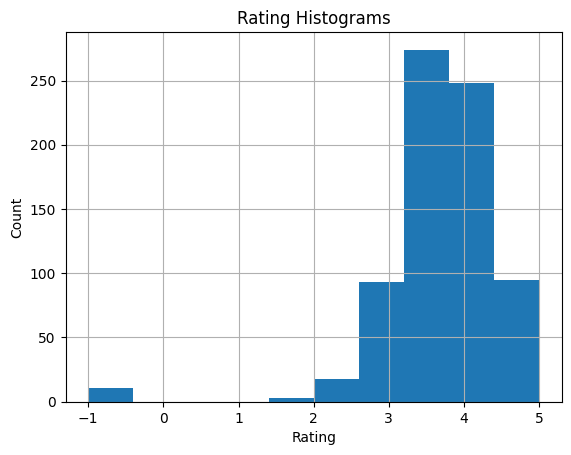

In [72]:
df['Rating'].hist()
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Histograms')

Text(0.5, 1.0, 'Companies Age Histogram')

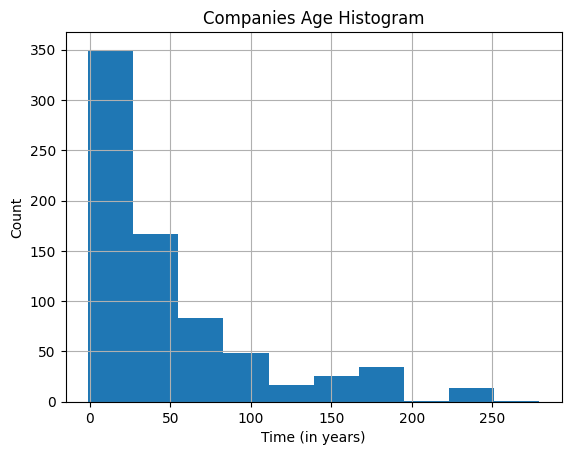

In [73]:
df['company_age'].hist()
plt.xlabel('Time (in years)')
plt.ylabel('Count')
plt.title("Companies Age Histogram")

Text(0.5, 1.0, 'Different roles in Job')

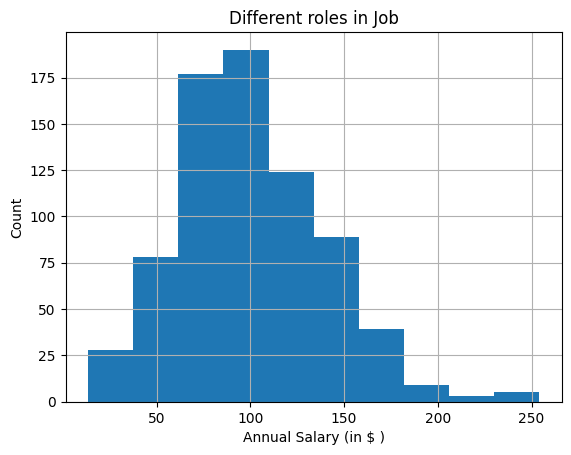

In [74]:
df['avg_salary'].hist()
plt.xlabel('Annual Salary (in $ )')
plt.ylabel('Count')
plt.title('Different roles in Job')

<Axes: ylabel='avg_salary'>

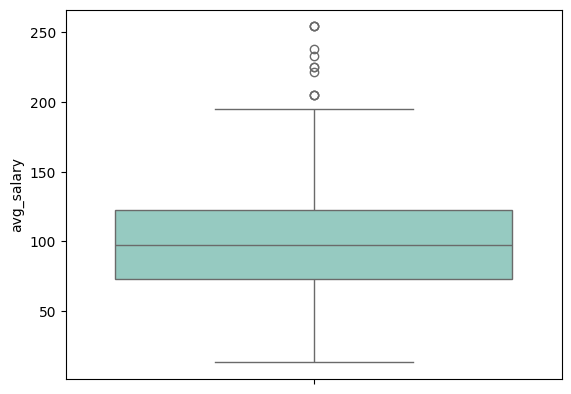

In [75]:
sns.boxplot(y = 'avg_salary', data = df, orient = 'v', palette = 'Set3')

<Axes: ylabel='company_age'>

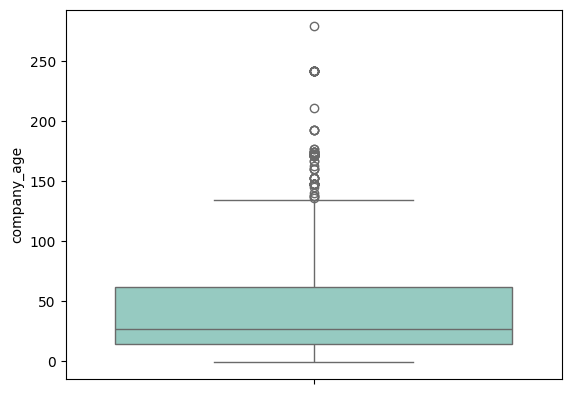

In [76]:
sns.boxplot(y = 'company_age', data = df, orient = 'v', palette = 'Set3')

<Axes: ylabel='Rating'>

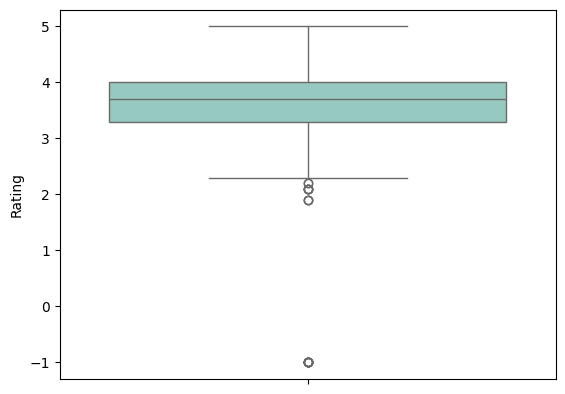

In [77]:
sns.boxplot(y = 'Rating', data = df, orient = 'v', palette = 'Set3')

In [78]:
df[['company_age', 'Rating', 'avg_salary']].corr()

,company_age,Rating,avg_salary
company_age,1.000000,0.026164,0.019410
Rating,0.026164,1.000000,0.013492
avg_salary,0.019410,0.013492,1.000000


<Axes: >

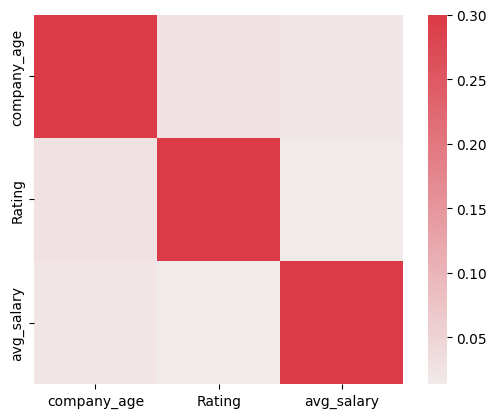

In [79]:
cmap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(df[['company_age', 'Rating', 'avg_salary']].corr(), vmax = .3, center = 0, cmap = cmap, square = True)

In [80]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary_per_hour', 'emp_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'company_age', 'python_job', 'r_job',
       'aws_job', 'spark_job', 'excel_job', 'sql_job', 'simplified_data',
       'Job_seniority'],
      dtype='object')

In [81]:
df.dtypes

Job Title               object
Salary Estimate         object
Job Description         object
Rating                 float64
Company Name            object
Location                object
Headquarters            object
Size                    object
Founded                  int64
Type of ownership       object
Industry                object
Sector                  object
Revenue                 object
Competitors              int64
salary_per_hour          int64
emp_provided_salary      int64
min_salary               int64
max_salary               int64
avg_salary             float64
job_state               object
company_age              int64
python_job               int64
r_job                    int64
aws_job                  int64
spark_job                int64
excel_job                int64
sql_job                  int64
simplified_data         object
Job_seniority           object
dtype: object

In [82]:
df_categorical = df[['Job Title','Company Name','Size','Sector', 'Location','Headquarters','Type of ownership','Industry','Revenue','simplified_data','Job_seniority']]

Graph for Location 
Total records: 20


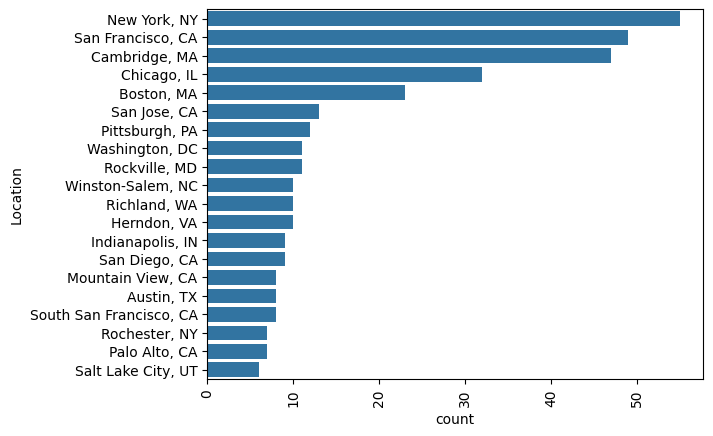

Graph for Headquarters 
Total records: 20


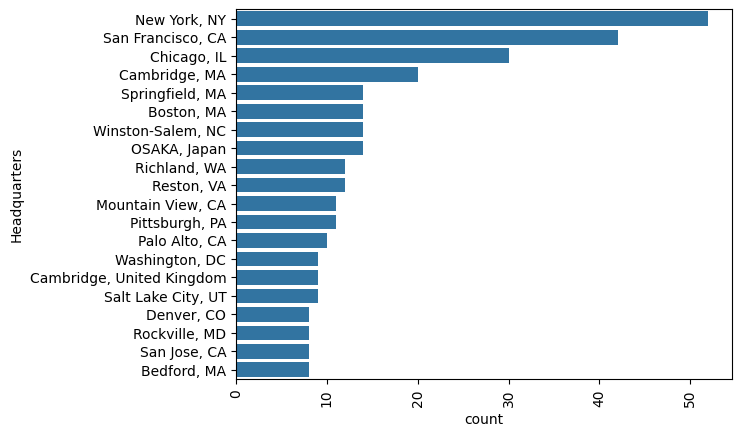

In [83]:
for i in ['Location','Headquarters']:
    unique_categories = df_categorical[i].value_counts()[:20]
    print('Graph for {} \nTotal records: {}'. format(i, len(unique_categories)))
    chart = sns.barplot(x = unique_categories, y = unique_categories.index)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()
    

Graph for Company Name 
Total records: 20


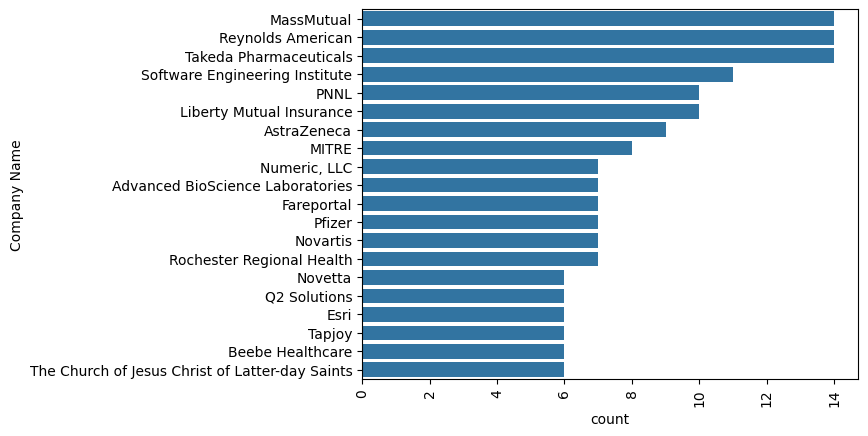

Graph for Size 
Total records: 8


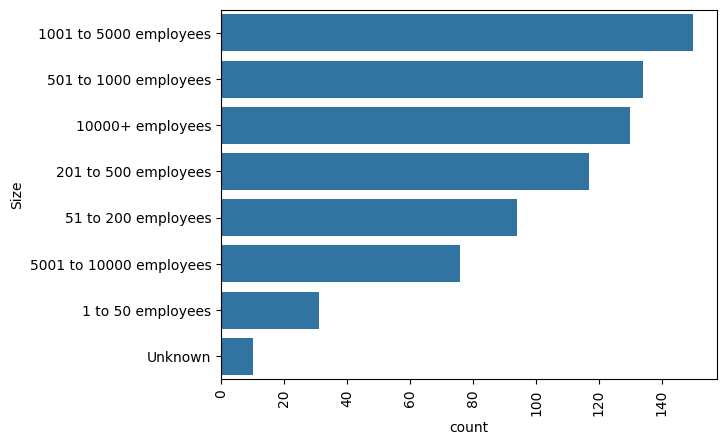

Graph for Type of ownership 
Total records: 9


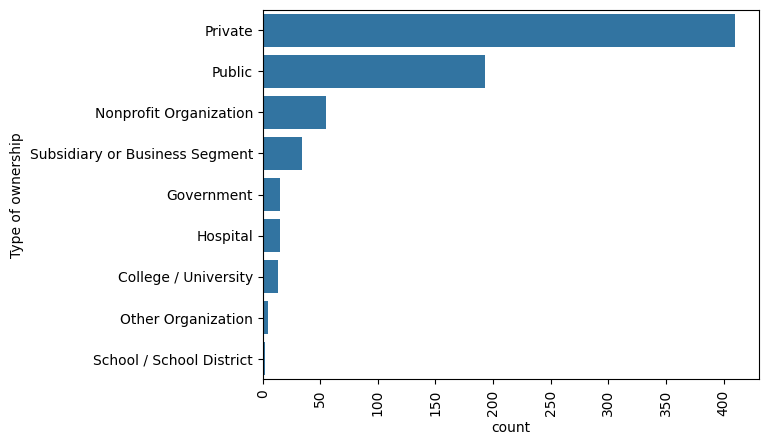

Graph for Revenue 
Total records: 13


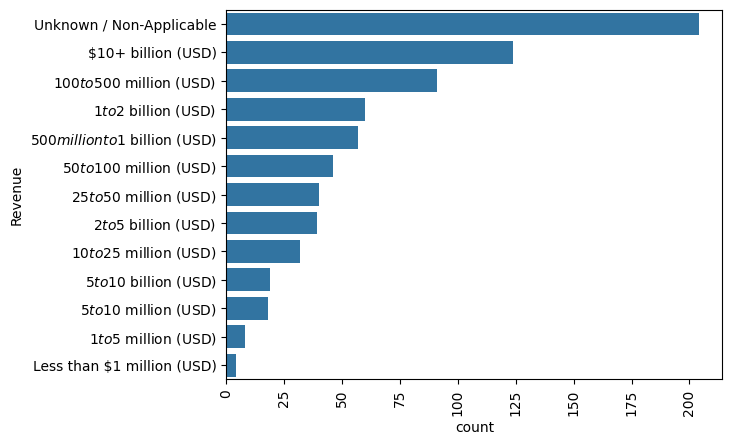

In [84]:
for i in ['Company Name','Size','Type of ownership','Revenue']:
    unique_categories = df_categorical[i].value_counts()[:20]
    print('Graph for {} \nTotal records: {}'. format(i, len(unique_categories)))
    chart = sns.barplot(x = unique_categories, y = unique_categories.index)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()
    

Graph for Industry 
Total records: 20


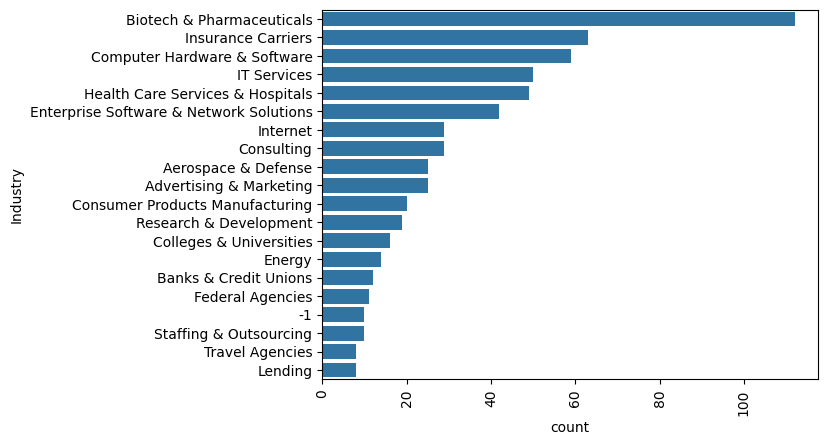

Graph for Sector 
Total records: 20


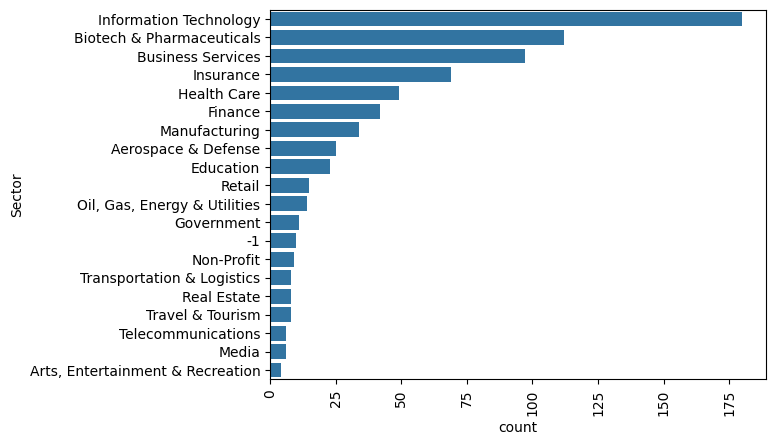

In [85]:
for i in ['Industry', 'Sector']:
    unique_categories = df_categorical[i].value_counts()[:20]
    print('Graph for {} \nTotal records: {}'. format(i, len(unique_categories)))
    chart = sns.barplot(x = unique_categories, y = unique_categories.index)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()
    

Graph for simplified_data 
Total records: 7


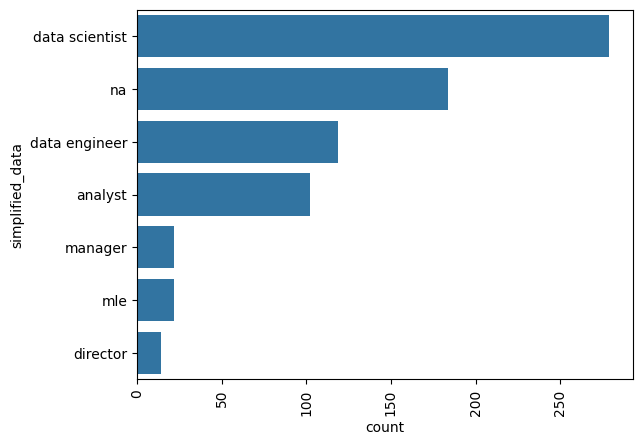

Graph for Job_seniority 
Total records: 3


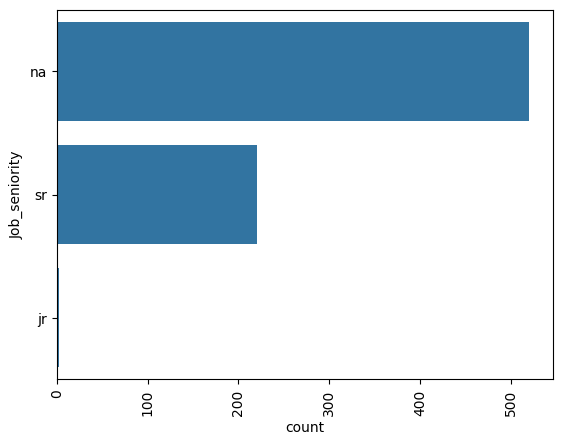

In [86]:
for i in ['simplified_data','Job_seniority']:
    unique_categories = df_categorical[i].value_counts()[:20]
    print('Graph for {} \nTotal records: {}'. format(i, len(unique_categories)))
    chart = sns.barplot(x = unique_categories, y = unique_categories.index)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()
    

In [87]:
pd.pivot_table(df, index = ['simplified_data','Job_seniority'], values = 'avg_salary')

avg_salary
simplified_data Job_seniority            
analyst         jr              56.500000
                na              61.155405
                sr              79.092593
data engineer   na              96.701220
                sr             124.689189
data scientist  jr             106.500000
                na             107.043011
                sr             138.956522
director        na             168.607143
manager         na              84.022727
mle             na             119.133333
                sr             142.071429
na              na              73.988189
                sr             109.061404

In [88]:
pd.pivot_table(df, index=['job_state', 'simplified_data'], values='avg_salary', aggfunc='mean').sort_values(by='avg_salary', ascending=False)


avg_salary
job_state simplified_data            
IL        director         221.750000
CA        mle              177.300000
NJ        director         161.500000
DC        data scientist   149.000000
CA        data scientist   143.044776
...                               ...
CO        na                31.500000
          analyst           29.500000
DE        na                27.500000
LA        na                20.000000
TN        analyst           13.500000

[115 rows x 1 columns]

In [89]:
pd.pivot_table(df, index='job_state', values='avg_salary').sort_values(by='avg_salary', ascending=False)


,avg_salary
job_state,
CA,123.619205
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [90]:
pd.pivot_table(df, index='Industry', values='avg_salary', aggfunc='mean').sort_values(by='avg_salary', ascending=False)


,avg_salary
Industry,
Other Retail Stores,163.500000
Motion Picture Production & Distribution,146.000000
Financial Analytics & Research,145.125000
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000
Auctions & Galleries,128.000000
Internet,123.810345
Investment Banking & Asset Management,118.400000


In [91]:
df = df[df['Industry'] != -1]

In [92]:
pd.pivot_table(df, index='Type of ownership', values='avg_salary', aggfunc='mean').sort_values(by='avg_salary', ascending=False)


,avg_salary
Type of ownership,
Public,110.893782
Subsidiary or Business Segment,110.573529
College / University,107.615385
Private,101.776829
Government,84.300000
Other Organization,77.900000
School / School District,77.750000
Nonprofit Organization,68.281818
Hospital,54.000000


In [93]:
pd.pivot_table(df, index='Company Name', values='avg_salary', aggfunc='mean').sort_values(by='avg_salary', ascending=False)


,avg_salary
Company Name,
Gallup,237.5
Sage Intacct,232.5
CA-One Tech Cloud,225.0
Grand Rounds,221.5
Credit Sesame,205.0
...,...
Texas Health Huguley Hospital,21.5
Tower Health,20.5
"Veterans Affairs, Veterans Health Administration",20.0


# Feature Engineering
## Trimming Columns

In [94]:
df.Industry.nunique()

60

In [95]:
industry_list = ['Motion Picture Production & Distribution','Financial Analytics & Research','Health, Beauty, & Fitness','Telecommunications Services','Brokerage Services','Auctions & Galleries','Internet','Investment Banking & Asset Management','TV Broadcast & Cable Networks','Enterprise Software & Network Solutions','Other Retail Stores']

In [96]:
def simplified_industry(text):
    if text not in industry_list:
        return 'Others'
    else:
        return text
df['Industry'] = df['Industry'].apply(simplified_industry)

In [97]:
df.job_state

0      NM
1      MD
2      FL
3      WA
4      NY
       ..
950    MA
951    TN
952    PA
953    PA
955    OH
Name: job_state, Length: 742, dtype: object

In [98]:
job_state_list = ['CA','MA','NY','VA','IL','MD','PA','TX','NC','WA']
def simplified_state(text):
    if text not in job_state_list:
        return 'Others'
    else:
        return text
df['job_state'] = df['job_state'].apply(simplified_state)

In [99]:
df.job_state

0      Others
1          MD
2      Others
3          WA
4          NY
        ...  
950        MA
951    Others
952        PA
953        PA
955    Others
Name: job_state, Length: 742, dtype: object

In [100]:
df['job_in_headquarters'] = df.apply(lambda x: 1 if x.Headquarters == x.Location else 0, axis = 1) 

In [101]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary_per_hour', 'emp_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'company_age', 'python_job', 'r_job',
       'aws_job', 'spark_job', 'excel_job', 'sql_job', 'simplified_data',
       'Job_seniority', 'job_in_headquarters'],
      dtype='object')

In [102]:
df_model = df.copy(deep = True)
df_model = df_model[['avg_salary','Rating','company_age','Size','Industry','Type of ownership','Revenue','Competitors','job_state','job_in_headquarters','python_job','spark_job','aws_job','excel_job','simplified_data','Job_seniority',]]

In [103]:
df.Size.value_counts()

Size
1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                     10
Name: count, dtype: int64

In [104]:
df_model.columns

Index(['avg_salary', 'Rating', 'company_age', 'Size', 'Industry',
       'Type of ownership', 'Revenue', 'Competitors', 'job_state',
       'job_in_headquarters', 'python_job', 'spark_job', 'aws_job',
       'excel_job', 'simplified_data', 'Job_seniority'],
      dtype='object')

## Handling Ordinal Categorical Features

In [105]:
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3, '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df_model['company_size_rank'] = df_model['Size'].map(size_map)
df_model.drop('Size', axis = True, inplace = True)

In [106]:
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3, '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7, '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)': 10, '$5 to $10 billion (USD)': 11, '$10+ billion (USD)': 12}

df_model['revenue_rank'] = df_model['Revenue'].map(revenue_map)
df_model.drop('Revenue', axis = True, inplace = True)

In [107]:
job_seniority_map = {'na': 0,'jr': 1,'sr': 2}

df_model['job_seniority_rank'] = df_model['Job_seniority'].map(job_seniority_map)
df_model.drop('Job_seniority', axis = True, inplace = True)

## Handling Nominal Categorical Features

In [113]:
df_model = pd.get_dummies(columns=['Type of ownership'], data=df_model)
df_model.shape

(742, 35)

In [112]:
df_model = pd.get_dummies(columns = ['Industry'], data = df_model)
df_model.shape

(742, 27)

In [114]:
df_model = pd.get_dummies(columns = ['simplified_data'], data = df_model)
df_model.shape

(742, 41)

In [115]:
df_model = pd.get_dummies(columns=['job_state'], data = df_model)
df_model.shape

(742, 51)

In [116]:
df['job_state']

0      Others
1          MD
2      Others
3          WA
4          NY
        ...  
950        MA
951    Others
952        PA
953        PA
955    Others
Name: job_state, Length: 742, dtype: object

In [117]:
df_model.head()

,avg_salary,Rating,company_age,Competitors,job_in_headquarters,python_job,spark_job,aws_job,excel_job,company_size_rank,...,job_state_IL,job_state_MA,job_state_MD,job_state_NC,job_state_NY,job_state_Others,job_state_PA,job_state_TX,job_state_VA,job_state_WA
0,72.0,3.8,50,0,0,1,0,0,1,4,...,False,False,False,False,False,True,False,False,False,False
1,87.5,3.4,39,0,0,1,0,0,0,7,...,False,False,True,False,False,False,False,False,False,False
2,85.0,4.8,13,0,1,1,1,0,1,4,...,False,False,False,False,False,True,False,False,False,False
3,76.5,3.8,58,3,1,1,0,0,0,5,...,False,False,False,False,False,False,False,False,False,True
4,114.5,2.9,25,3,1,1,0,0,1,2,...,False,False,False,False,True,False,False,False,False,False


In [118]:
df_model.isnull().sum()
df_model.dropna(inplace=True)

In [119]:
df_model.isnull().sum()

avg_salary                                           0
Rating                                               0
company_age                                          0
Competitors                                          0
job_in_headquarters                                  0
python_job                                           0
spark_job                                            0
aws_job                                              0
excel_job                                            0
company_size_rank                                    0
revenue_rank                                         0
job_seniority_rank                                   0
Industry_Auctions & Galleries                        0
Industry_Brokerage Services                          0
Industry_Enterprise Software & Network Solutions     0
Industry_Financial Analytics & Research              0
Industry_Health, Beauty, & Fitness                   0
Industry_Internet                                    0
Industry_I

In [120]:
x = df_model.drop('avg_salary', axis = 1)
y = df_model['avg_salary']

In [121]:
df_model.dtypes

avg_salary                                           float64
Rating                                               float64
company_age                                            int64
Competitors                                            int64
job_in_headquarters                                    int64
python_job                                             int64
spark_job                                              int64
aws_job                                                int64
excel_job                                              int64
company_size_rank                                      int64
revenue_rank                                           int64
job_seniority_rank                                     int64
Industry_Auctions & Galleries                           bool
Industry_Brokerage Services                             bool
Industry_Enterprise Software & Network Solutions        bool
Industry_Financial Analytics & Research                 bool
Industry_Health, Beauty,

# Feature Scaling

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['Rating', 'Competitors', 'company_age','company_size_rank','revenue_rank']
x[columns_to_scale] = scaler.fit_transform(x[columns_to_scale])

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [124]:
print("Training set size: {} and testing set size {}".format(x_train.shape, x_test.shape))

Training set size: (593, 50) and testing set size (149, 50)


# Model Building

In [130]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [126]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [137]:
models = {
    "Linear Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
}

for model_name, model in models.items():
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_test_mse = mean_squared_error(y_test, y_test_pred)

    model_train_r2 = r2_score(y_train, y_train_pred)
    model_test_r2 = r2_score(y_test, y_test_pred)

    print(model_name)
    print('Training set')
    print('Mean Squared Error: {}'.format(model_train_mse))
    print('R-squared: {:.4f}'.format(model_train_r2))

    print('Testing set')
    print('Mean Squared Error: {}'.format(model_test_mse))
    print('R-squared: {:.4f}'.format(model_test_r2))

Linear Regression
Training set
Mean Squared Error: 604.0337488617862
R-squared: 0.5900
Testing set
Mean Squared Error: 703.8827278117816
R-squared: 0.5694
Decision Tree
Training set
Mean Squared Error: 8.704082349634625
R-squared: 0.9941
Testing set
Mean Squared Error: 566.1926850298285
R-squared: 0.6536
Random Forest
Training set
Mean Squared Error: 71.56338027919995
R-squared: 0.9514
Testing set
Mean Squared Error: 409.07997547535314
R-squared: 0.7497


In [131]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
print("Accuracy of the Linear Regression Model on Training set is : {}% and on Test set is {}%".format(round(lr_model.score(x_train, y_train),4)*100, round(lr_model.score(x_test, y_test),4)*100))

Accuracy of the Linear Regression Model on Training set is : 59.37% and on Test set is 54.730000000000004%


In [132]:
forest_model = RandomForestRegressor()
forest_model.fit(x_train, y_train)
print("Accuracy train: {} and test: {}".format(round(forest_model.score(x_train, y_train), 4)*100, round(forest_model.score(x_test, y_test), 4)*100 ))

Accuracy train: 95.34 and test: 74.16


In [133]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
print("Accuracy train: {} and test: {}".format(round(ridge_model.score(x_train, y_train), 4)*100, round(ridge_model.score(x_test, y_test), 4)*100 ))

Accuracy train: 59.0 and test: 56.940000000000005


In [134]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
print("Accuracy train: {} and test: {}".format(round(dt_model.score(x_train, y_train), 4)*100, round(dt_model.score(x_test, y_test), 4)*100 ))

Accuracy train: 99.41 and test: 53.769999999999996


In [135]:
from sklearn.ensemble import AdaBoostRegressor
adb_model = AdaBoostRegressor()
adb_model.fit(x_train, y_train)


AdaBoostRegressor()

In [136]:
print("Accuracy train: {} and test: {}".format(round(adb_model.score(x_train, y_train), 4)*100, round(adb_model.score(x_test, y_test), 4)*100 ))

Accuracy train: 55.1 and test: 47.74


In [143]:
import pickle

In [147]:
pickle.dump(forest_model,open('Salary_Prediction.pkl','wb'))

In [148]:
pickeled_model = pickle.load(open('Salary_Prediction.pkl','rb'))